In [10]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

import re
import string 
import numpy as np

# GabHateCorpus

In [4]:
filepath = "Dataset/GabHateCorpus/"
df = pd.read_csv(filepath+"GHC_all.tsv", sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27546 entries, 0 to 27545
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    27546 non-null  object
 1   hd      27546 non-null  int64 
 2   cv      27546 non-null  int64 
 3   vo      27546 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 860.9+ KB


In [5]:
df.head()

,text,hd,cv,vo
0,He most likely converted to islam due to his n...,0,0,0
1,So Ford lied about being a psychologist. Recor...,0,0,0
2,Jobs. Education. Ending abuse of Nation. CA43.,0,0,0
3,"I share a lot of your values, & like many who ...",0,0,0
4,I am so ready to get back to blogging! www.ben...,0,0,0


In [6]:
df_cat = df[['hd', 'cv', 'vo']].copy()
df_sum = df_cat.sum()

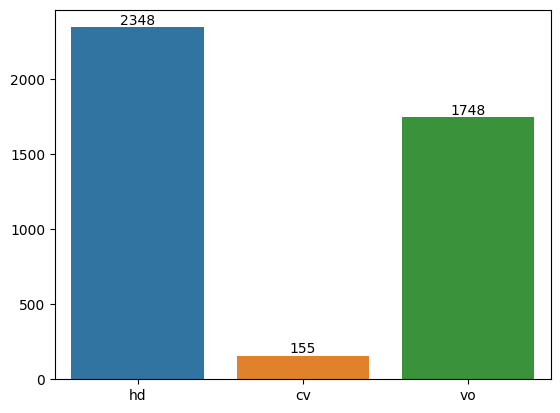

In [7]:
p = sb.barplot(x=df_sum.index, y = df_sum.values)
p.bar_label(p.containers[0])
plt.show()

In [8]:
# classify hd, cv, vo into hate
df['hate'] = df['hd'] | df['cv'] | df['vo']
df['class'] = df['hate'].map({0:"Non-Hate", 1:"Hate"})
df_needed = df[['class', 'text', 'hate']].copy()
df_needed.head(5)

,class,text,hate
0,Non-Hate,He most likely converted to islam due to his n...,0
1,Non-Hate,So Ford lied about being a psychologist. Recor...,0
2,Non-Hate,Jobs. Education. Ending abuse of Nation. CA43.,0
3,Non-Hate,"I share a lot of your values, & like many who ...",0
4,Non-Hate,I am so ready to get back to blogging! www.ben...,0


In [10]:
df['hate'].value_counts()

hate
0    24169
1     3377
Name: count, dtype: int64

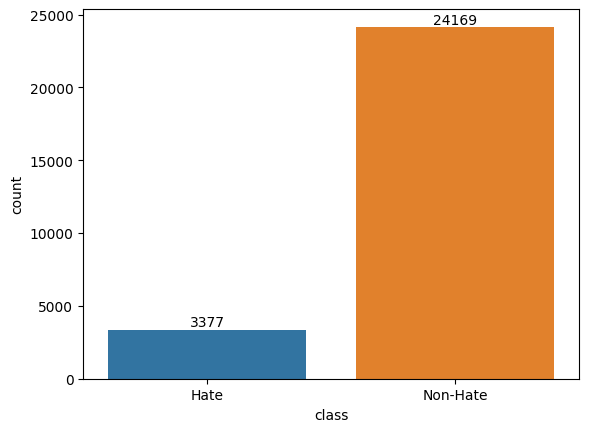

In [9]:
p = sb.countplot(x='class', data=df_needed, order=["Hate", "Non-Hate"])
p.bar_label(p.containers[0])
plt.show()

In [ ]:
df_needed.to_csv(filepath+"data_needed.csv", index=False)

# SE2019-task5

In [11]:
filepath = "Dataset/SE2019/"
df = pd.read_csv(filepath+"hateval2019_all.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13000 entries, 0 to 12999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      13000 non-null  int64 
 1   text    13000 non-null  object
 2   HS      13000 non-null  int64 
 3   TR      13000 non-null  int64 
 4   AG      13000 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 507.9+ KB


In [12]:
df.head()

,id,text,HS,TR,AG
0,201,"Hurray, saving us $$$ in so many ways @potus @...",1,0,0
1,202,Why would young fighting age men be the vast m...,1,0,0
2,203,@KamalaHarris Illegals Dump their Kids at the ...,1,0,0
3,204,NY Times: 'Nearly All White' States Pose 'an A...,0,0,0
4,205,Orban in Brussels: European leaders are ignori...,0,0,0


In [13]:
df['HS'].value_counts()

HS
0    7530
1    5470
Name: count, dtype: int64

In [14]:
# will be using only the HS column
# renaming it to hate column 
df['class'] = df['HS'].map({0:"Non-Hate", 1:"Hate"})
df['hate'] = df['class'].apply(lambda x: 1 if x =='Hate' else 0)

df_needed = df[['class', 'text', 'hate']].copy()
df_needed.head(5)

,class,text,hate
0,Hate,"Hurray, saving us $$$ in so many ways @potus @...",1
1,Hate,Why would young fighting age men be the vast m...,1
2,Hate,@KamalaHarris Illegals Dump their Kids at the ...,1
3,Non-Hate,NY Times: 'Nearly All White' States Pose 'an A...,0
4,Non-Hate,Orban in Brussels: European leaders are ignori...,0


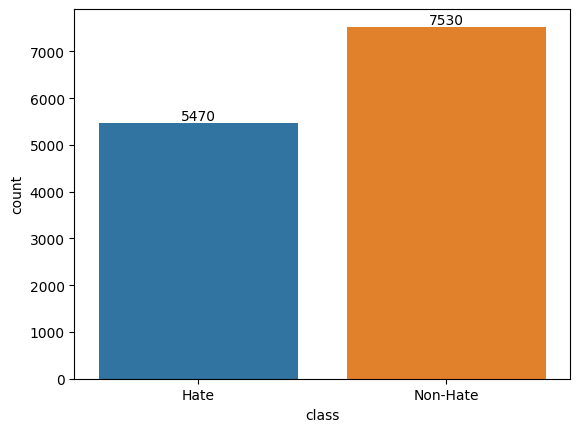

In [15]:
p = sb.countplot(x='class', data=df_needed, order=["Hate", "Non-Hate"])
p.bar_label(p.containers[0])
plt.show()

In [ ]:
df_needed.to_csv(filepath+"data_needed.csv", index=False)

# Implicit hate

In [16]:
filepath = "Dataset/Implicit_hate_corpus/"
df = pd.read_csv(filepath+"implicit_hate_v1_stg1_posts.tsv", sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21480 entries, 0 to 21479
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   post    21480 non-null  object
 1   label   21480 non-null  object
dtypes: object(2)
memory usage: 335.8+ KB


In [17]:
df['label'].value_counts()

label
not_hate         13291
implicit_hate     7100
explicit_hate     1089
Name: count, dtype: int64

In [18]:
df.head()

,post,label
0,""" : jewish harvard professor noel ignatiev w...",implicit_hate
1,b.higher education is a part of european cult...,not_hate
2,"has a problem with "" the whites "" "" and "" "" ...",not_hate
3,is yasir qadhi a hate preacher for calling ch...,not_hate
4,"rt "" : how three million germans mass murder...",not_hate


In [21]:
# classify implicit hate and explicit hate to hate
df['class'] = df['label'].map({"not_hate":"Non-Hate", "implicit_hate":"Hate", "explicit_hate":"Hate"})
df['hate'] = df['class'].map({"Hate":1, "Non-Hate":0})
df_needed = df[['class', 'post', 'hate']].copy()
df_needed.head()

,class,post,hate
0,Hate,""" : jewish harvard professor noel ignatiev w...",1
1,Non-Hate,b.higher education is a part of european cult...,0
2,Non-Hate,"has a problem with "" the whites "" "" and "" "" ...",0
3,Non-Hate,is yasir qadhi a hate preacher for calling ch...,0
4,Non-Hate,"rt "" : how three million germans mass murder...",0


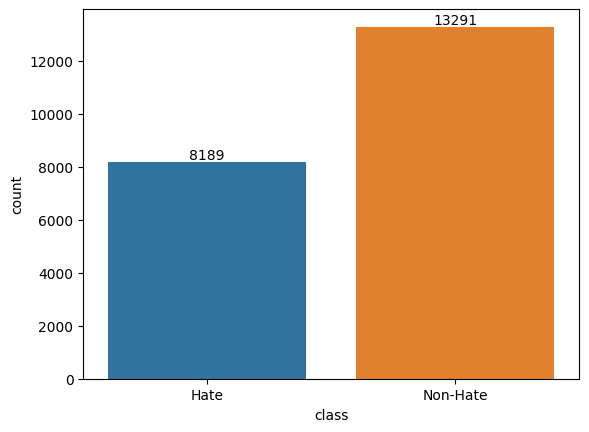

In [22]:
p = sb.countplot(x='class', data=df_needed, order=["Hate", "Non-Hate"])
p.bar_label(p.containers[0])
plt.show()

In [ ]:
df_needed.to_csv(filepath+"data_needed.csv", index=False)

# Balanced

In [23]:
def get_equal(df):
    df_hate = df[df['class']=='Hate'] 
    n = len(df_hate)
    df_non_hate = df[df['class'] == 'Non-Hate'].sample(n, random_state = 42)
    return pd.concat([df_hate,df_non_hate]).sample(n*2)

In [24]:
filepath = "Dataset/"
dataset_option = "/data_needed.csv"
dataset_name = "GabHateCorpus"
df_gab = pd.read_csv(filepath+dataset_name+dataset_option)

dataset_name = "Implicit_hate_corpus"
df_implicit = pd.read_csv(filepath+dataset_name+dataset_option)

dataset_name = "SE2019"
df_se = pd.read_csv(filepath+dataset_name+dataset_option)

In [25]:
gab_count = df_gab['class'].value_counts()
implicit_count = df_implicit['class'].value_counts()
se_count = df_se['class'].value_counts()
print(gab_count)
print(implicit_count)
print(se_count)
sum = gab_count[1] + implicit_count[1] + se_count[1]
print()
print("total hate", sum)

class
Non-Hate    24169
Hate         3377
Name: count, dtype: int64
class
Non-Hate    13291
Hate         8189
Name: count, dtype: int64
class
Non-Hate    7530
Hate        5470
Name: count, dtype: int64

total hate 17036


In [26]:
df_gab1 = get_equal(df_gab)
df_implicit1 = get_equal(df_implicit)
df_se1 = get_equal(df_se)
df_all = pd.concat([df_gab1, df_implicit1, df_se1])
df_all['class'].value_counts()

class
Hate        17036
Non-Hate    17036
Name: count, dtype: int64

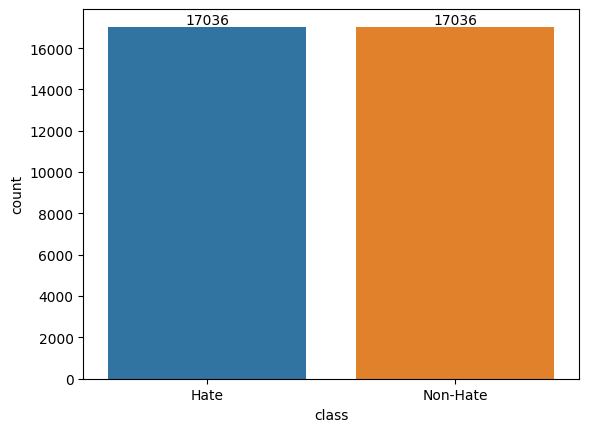

In [27]:
p = sb.countplot(x='class', data=df_all, order=["Hate", "Non-Hate"])
p.bar_label(p.containers[0])
plt.show()

In [ ]:
df_all.to_csv("Dataset/Balanced/data_needed.csv", index=False)

# Text Preprocessing

In [ ]:
import emoji

In [ ]:
def clean(text):
    text = str(text).lower()
    text = emoji.replace_emoji(text) # remove emoji
    text = re.sub('@[\w]*', '', text) #remove tweeter handler
    text = re.sub('\[.*?\]', '', text) # remove puncuation??
    text = re.sub('https?://\S+|www\.\S+', '', text) #replace URL
    text = re.sub('<.*?>+', '', text) # remove anything in the <>
    text = re.sub("[^a-zA-Z ]", "", text) #remove punctuation, number, special character,keep hash ("[^a-zA-Z# ]", "", text)
    text = re.sub('\n', '', text) #remove line break
    text = re.sub('\w*\d\w*', '', text) # not sure
    text = re.sub(r'\s+', ' ', text) #remove multiple spaces
    return text

In [ ]:
filepath = "Dataset/Balanced/"
df = pd.read_csv(filepath+"data_needed.csv")
df.head()

In [ ]:
# clean
df['text'] = df['text'].apply(clean)
df.head(6)

In [ ]:
df[df['text'] == " "], df[df['text'] == ""]

In [ ]:
print(df['class'].value_counts())
df = df[df['text'] != ""]
df = df[df['text'] != " "]
print(df['class'].value_counts())

In [ ]:
# save to csv
filename = "data_final.csv"
df.to_csv(filepath+filename, index=False)

# Analyze

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import seaborn as sns

In [3]:
# nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

special_stop = ['like','get', 'one', 'would', 'im', 'us', 'know', 'via','dont', 'want', 'rt', 'youre', 'u', 'go']
for i in special_stop:
    stop_words.add(i)

In [4]:
def load_dataset(ds):
    if ds == 1:
        dataset_name = "GabHateCorpus"
    elif ds == 2:
        dataset_name = "Implicit_hate_corpus"
    elif ds == 3:
        dataset_name = "SE2019"
    else:
        dataset_name = "Balanced"

    filepath = "Dataset/"+dataset_name
    df = pd.read_csv(filepath+"/data_final.csv")
    
    print(df['class'].value_counts(normalize=True))
    return df, dataset_name

def remove_stop_word(text):
    token = [word for word in text.split(' ') if word not in stop_words]
    return ' '.join(token)

In [5]:
def generate_word_cloud(col):
    all_words = ' '.join([text for text in col])
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def generate_top_word(count, col1, col2):
    hate_data = ' '.join(col1)
    hate_words = hate_data.split()
    hate_counts = pd.Series(hate_words).value_counts()

    non_hate_data = ' '.join(col2)
    non_hate_words = non_hate_data.split()
    non_hate_counts = pd.Series(non_hate_words).value_counts()

    top_x_hate_words = hate_counts.head(count)
    top_x_non_hate_words = non_hate_counts.head(count)

    fig, axes = plt.subplots(1, 2, figsize=(24, 8))

    axes[0].set_title('Hate')
    axes[0].bar(top_x_hate_words.index, top_x_hate_words.values)
    axes[0].set_xlabel('Words')
    axes[0].set_ylabel('Frequency')
    axes[0].tick_params('x', labelrotation=45)

    axes[1].set_title('Non-hate')
    axes[1].bar(top_x_non_hate_words.index, top_x_non_hate_words.values)
    axes[1].set_xlabel('Words')
    axes[1].set_ylabel('Frequency')
    axes[1].tick_params('x', labelrotation=45)

    plt.show()

In [14]:
def word_stat(col1):
    print('Average word length in dataset is {0:.0f}.'.format(np.mean(col1.apply(lambda x: len(x.split())))))
    print('Max word length in dataset is {0:.0f}.'.format(np.max(col1.apply(lambda x: len(x.split())))))
    print('Average character length in dataset is {0:.0f}.'.format(np.mean(col1.apply(lambda x: len(x)))))


In [15]:
def load_clasiify_ds(ds):
    df, dataset_name = load_dataset(ds)

    word_stat(df['text'])

    df['text'] = df['text'].apply(remove_stop_word)

    two_groups = df.groupby('class')
    hate = two_groups.get_group('Hate')
    non_hate = two_groups.get_group('Non-Hate')
    print(len(hate))
    print(len(non_hate))
    return hate['text'], non_hate['text']

class
Non-Hate    0.876805
Hate        0.123195
Name: proportion, dtype: float64
Average word length in dataset is 20.
Max word length in dataset is 268.
Average character length in dataset is 112.
3344
23800


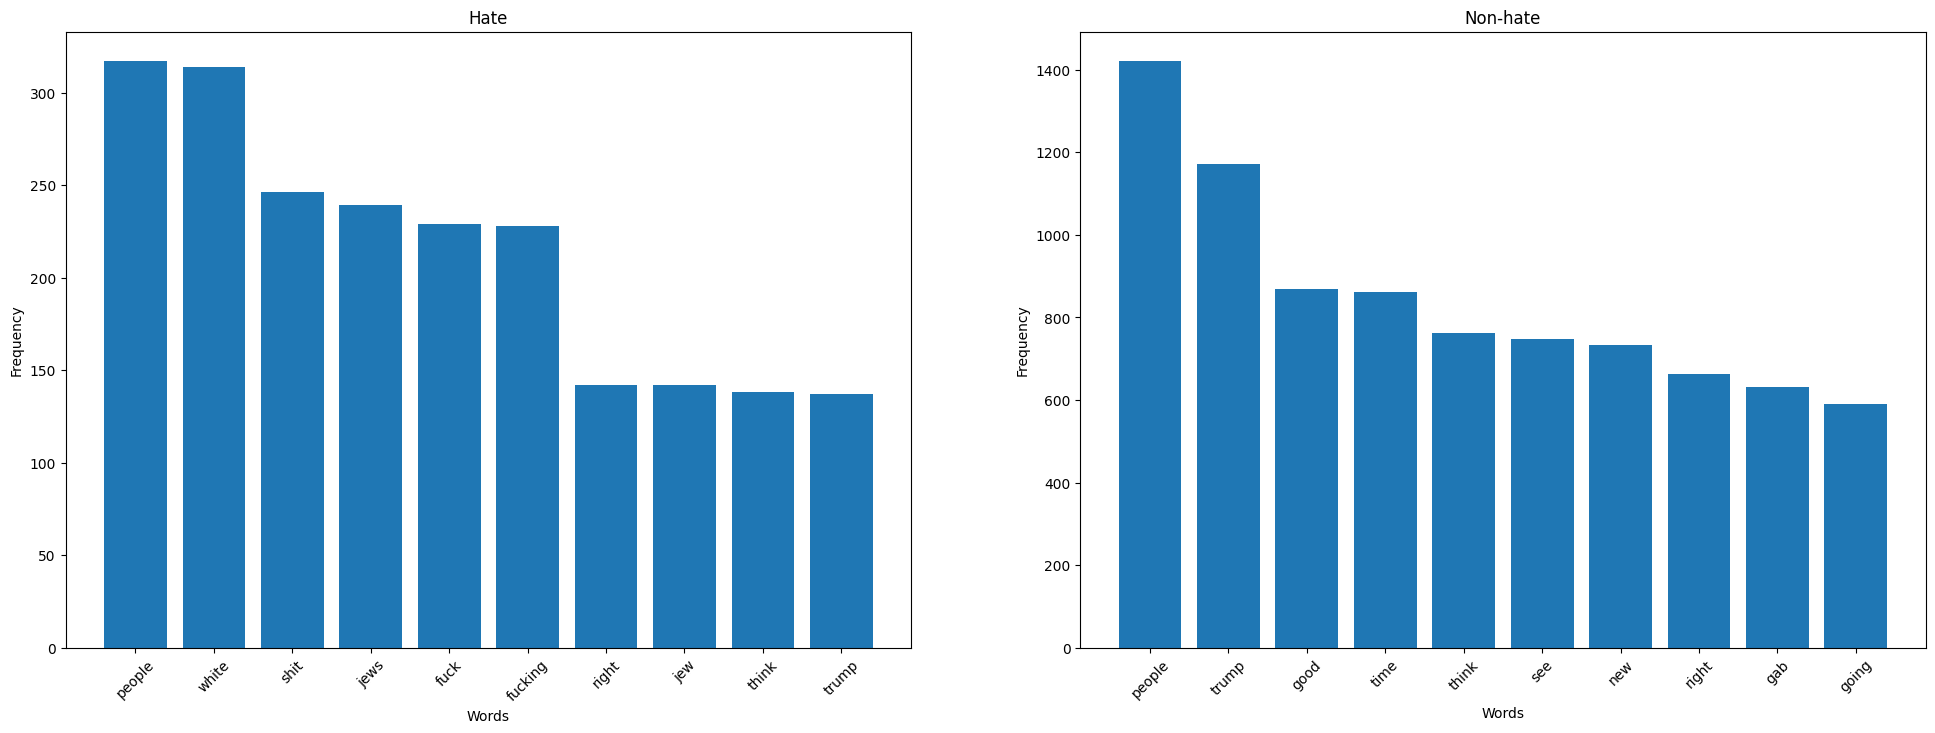

In [16]:
h, nh = load_clasiify_ds(1)
generate_top_word(10, h, nh)

class
Non-Hate    0.618726
Hate        0.381274
Name: proportion, dtype: float64
Average word length in dataset is 15.
Max word length in dataset is 154.
Average character length in dataset is 84.
8189
13289


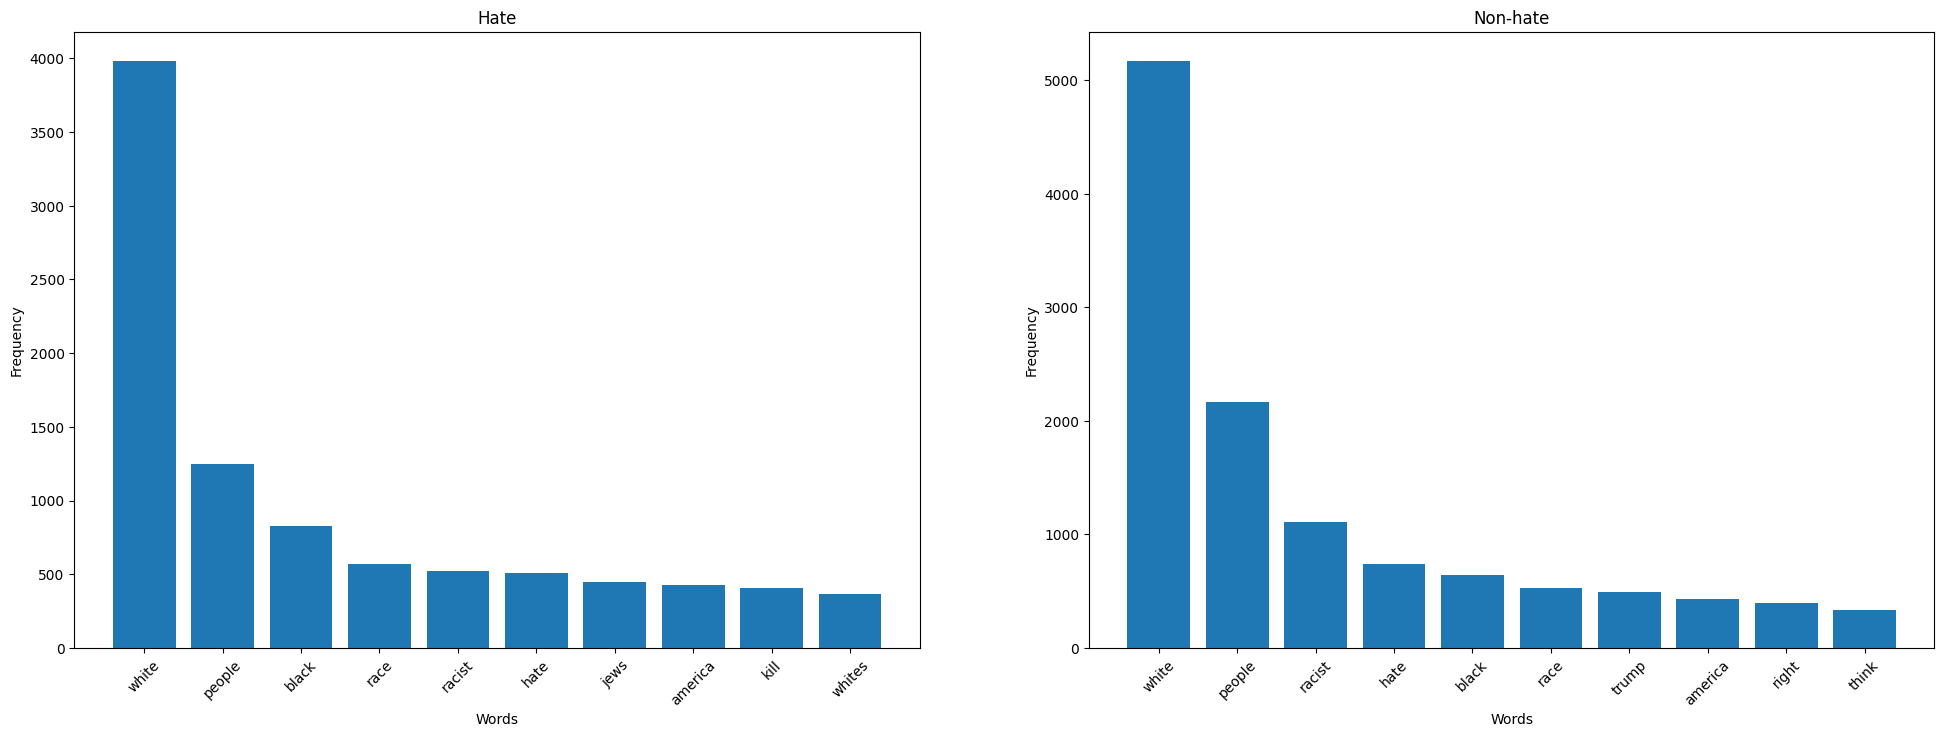

In [17]:
h, nh = load_clasiify_ds(2)
generate_top_word(10, h, nh)

class
Non-Hate    0.578737
Hate        0.421263
Name: proportion, dtype: float64
Average word length in dataset is 20.
Max word length in dataset is 63.
Average character length in dataset is 116.
5468
7512


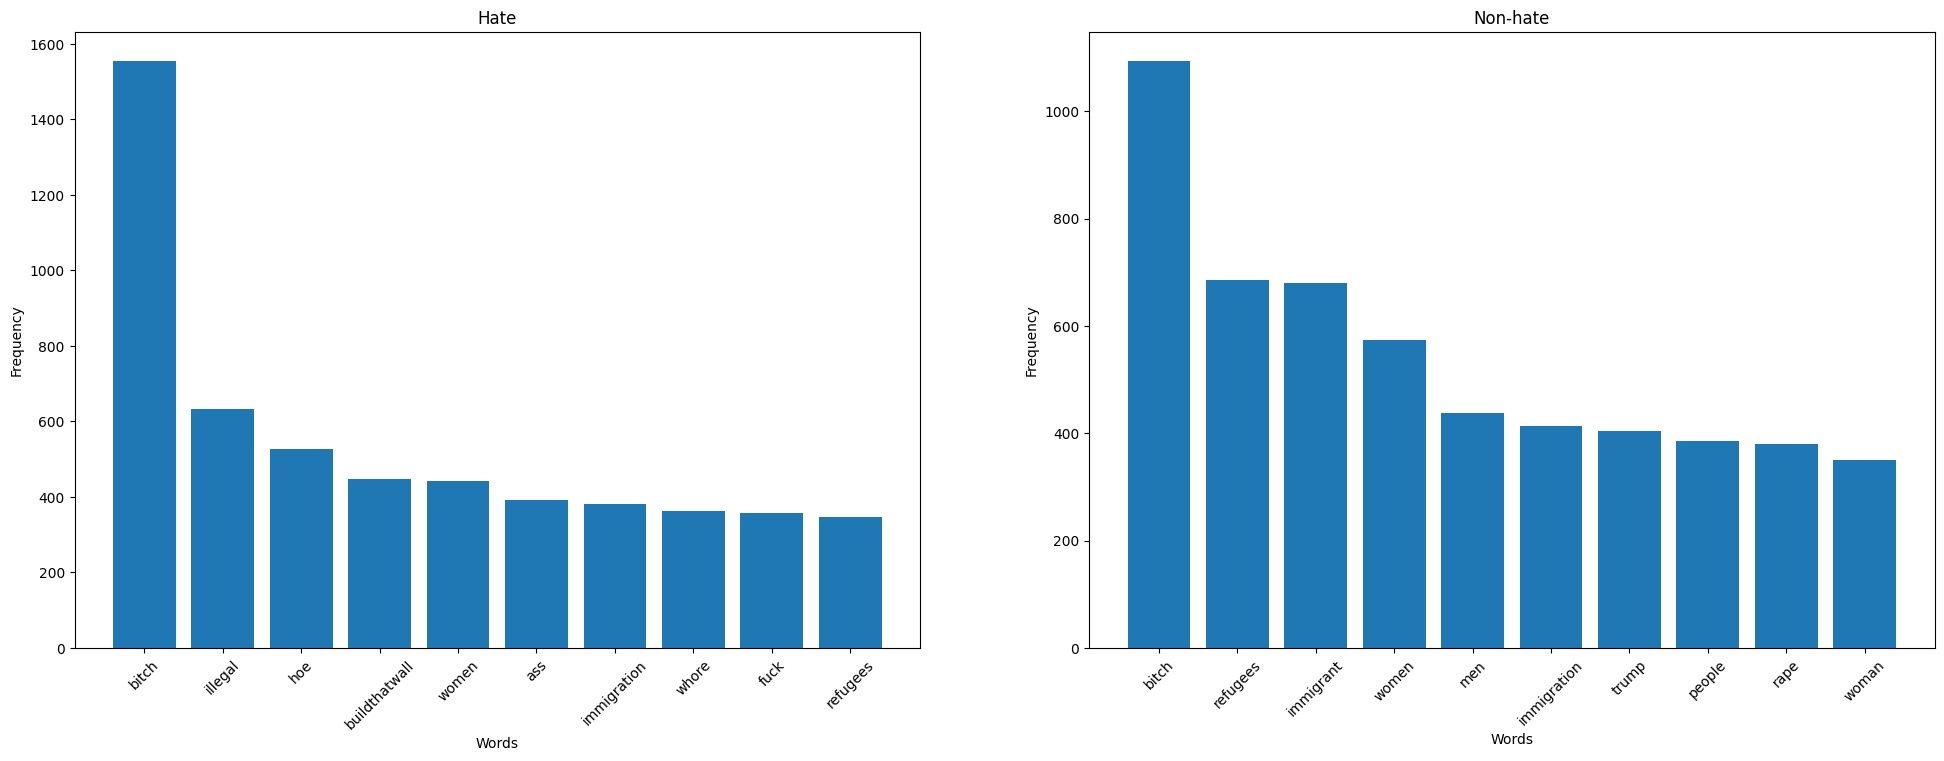

In [18]:
h, nh = load_clasiify_ds(3)
generate_top_word(10, h, nh)

class
Hate        0.500427
Non-Hate    0.499573
Name: proportion, dtype: float64
Average word length in dataset is 18.
Max word length in dataset is 189.
Average character length in dataset is 103.
17001
16972


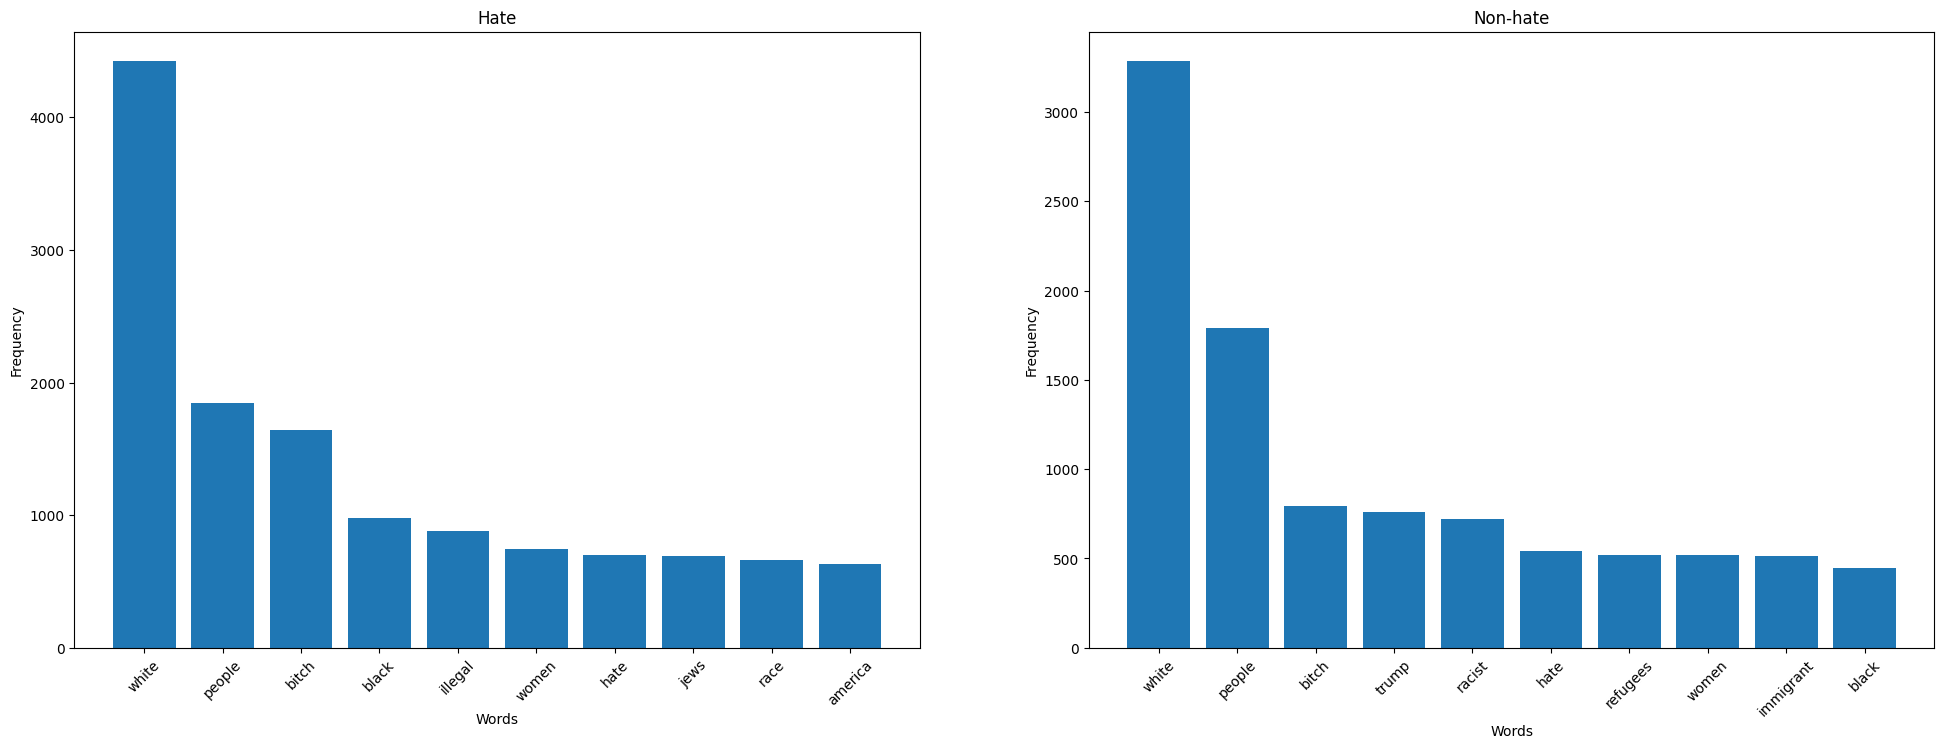

In [20]:
h, nh = load_clasiify_ds(4)
generate_top_word(10, h, nh)